In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'Capillry_Flow_conditions_all_parameters.ipynb',
 'Capillry_Flow_conditions_reduced_params _without_scaling.ipynb',
 'Capillry_Flow_conditions_reduced_params.ipynb',
 'Flow Regime plot.ipynb',
 'flow_all_params.csv',
 'flow_cases_regime_plot.csv',
 'flow_cases_regime_plot.xlsx',
 'flow_reduced_params.csv',
 'flow_reduced_params.xlsx',
 'flow_reduced_params_for_regime_plot.csv',
 'flow_reduced_params_for_regime_plot.xlsx',
 'ML_model_allparamaters1.xlsx',
 'ML_model_allparamaters2.csv',
 'ML_model_allparamaters2.xlsx',
 'no_flow_cases_regime.csv',
 'no_flow_cases_regime.xlsx',
 'Regime_plot.png',
 'roc curve trails.ipynb',
 'xgboost-1.6.1-pp38-pypy38_pp73-win_amd64.whl']

In [3]:
raw_df = pd.read_csv('flow_reduced_params.csv',low_memory=False)[0:324]

In [4]:
raw_df

,h1/h2,w1/w2,cos_theta,sigma,flow_condition
0,0.500000,0.50,0.388642,51.3,No
1,0.666667,0.50,0.388642,51.3,No
2,0.750000,0.50,0.388642,51.3,No
3,0.800000,0.50,0.388642,51.3,No
4,0.857143,0.50,0.388642,51.3,No
...,...,...,...,...,...
319,0.666667,0.25,0.799029,28.0,Yes
320,0.750000,0.25,0.799029,28.0,Yes
321,0.800000,0.25,0.799029,28.0,Yes
322,0.857143,0.25,0.799029,28.0,Yes


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h1/h2           324 non-null    float64
 1   w1/w2           324 non-null    float64
 2   cos_theta       324 non-null    float64
 3   sigma           324 non-null    float64
 4   flow_condition  324 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.8+ KB


In [6]:
raw_df.describe()

,h1/h2,w1/w2,cos_theta,sigma
count,324.000000,324.000000,324.000000,324.000000
mean,0.683583,0.337566,0.587048,36.500000
std,0.158217,0.078244,0.145427,8.053582
min,0.333333,0.250000,0.388642,28.000000
25%,0.600000,0.285714,0.446822,30.000000
50%,0.750000,0.333333,0.580611,33.850000
75%,0.800000,0.400000,0.726575,42.000000
max,0.888889,0.500000,0.799029,51.300000


In [7]:
pd.value_counts(raw_df['flow_condition'])

No     191
Yes    133
Name: flow_condition, dtype: int64

## Training, Validation and Test Sets

    Let's divide the data we have into three datasets for training, validation and testing. We will split the data into 60%, 20%, 20%

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 45)
train_df, val_df = train_test_split(raw_df, test_size = 0.25, random_state = 45)

In [10]:
pd.value_counts(train_df['flow_condition'])

No     141
Yes    102
Name: flow_condition, dtype: int64

In [11]:
pd.value_counts(val_df['flow_condition'])

No     50
Yes    31
Name: flow_condition, dtype: int64

In [12]:
pd.value_counts(test_df['flow_condition'])

No     37
Yes    28
Name: flow_condition, dtype: int64

In [13]:
train_df

,h1/h2,w1/w2,cos_theta,sigma,flow_condition
230,0.750000,0.285714,0.541958,36.1,No
148,0.857143,0.333333,0.388642,51.3,No
224,0.750000,0.285714,0.446822,42.0,No
197,0.800000,0.285714,0.541958,36.1,No
238,0.857143,0.285714,0.619265,31.6,Yes
...,...,...,...,...,...
163,0.666667,0.333333,0.619265,31.6,Yes
213,0.666667,0.285714,0.799029,28.0,Yes
95,0.800000,0.333333,0.619265,31.6,No
32,0.750000,0.500000,0.799029,28.0,Yes


In [14]:
val_df

,h1/h2,w1/w2,cos_theta,sigma,flow_condition
138,0.500000,0.400000,0.799029,28.0,Yes
176,0.750000,0.333333,0.799029,28.0,Yes
20,0.750000,0.500000,0.619265,31.6,Yes
33,0.800000,0.500000,0.799029,28.0,Yes
118,0.857143,0.400000,0.446822,42.0,No
...,...,...,...,...,...
115,0.666667,0.400000,0.446822,42.0,No
218,0.750000,0.285714,0.388642,51.3,No
146,0.750000,0.333333,0.388642,51.3,No
145,0.666667,0.333333,0.388642,51.3,No


In [15]:
test_df

,h1/h2,w1/w2,cos_theta,sigma,flow_condition
138,0.500000,0.400000,0.799029,28.0,Yes
176,0.750000,0.333333,0.799029,28.0,Yes
20,0.750000,0.500000,0.619265,31.6,Yes
33,0.800000,0.500000,0.799029,28.0,Yes
118,0.857143,0.400000,0.446822,42.0,No
...,...,...,...,...,...
223,0.666667,0.285714,0.446822,42.0,No
290,0.750000,0.250000,0.388642,51.3,No
13,0.666667,0.500000,0.541958,36.1,Yes
3,0.800000,0.500000,0.388642,51.3,No


In [16]:
input_cols = list(train_df.columns)[:-1]
target_cols = 'flow_condition'

In [17]:
target_cols

'flow_condition'

In [18]:
input_cols

['h1/h2', 'w1/w2', 'cos_theta', 'sigma']

In [19]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [20]:
val_inputs = val_df[input_cols].copy()
val_targets =  val_df[target_cols].copy()

In [21]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [22]:
train_inputs

,h1/h2,w1/w2,cos_theta,sigma
230,0.750000,0.285714,0.541958,36.1
148,0.857143,0.333333,0.388642,51.3
224,0.750000,0.285714,0.446822,42.0
197,0.800000,0.285714,0.541958,36.1
238,0.857143,0.285714,0.619265,31.6
...,...,...,...,...
163,0.666667,0.333333,0.619265,31.6
213,0.666667,0.285714,0.799029,28.0
95,0.800000,0.333333,0.619265,31.6
32,0.750000,0.500000,0.799029,28.0


In [23]:
train_targets.dtype

dtype('O')

In [24]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
numeric_cols

['h1/h2', 'w1/w2', 'cos_theta', 'sigma']

### Scaling Numeric Features

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [27]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [28]:
train_targets

230     No
148     No
224     No
197     No
238    Yes
      ... 
163    Yes
213    Yes
95      No
32     Yes
131    Yes
Name: flow_condition, Length: 243, dtype: object

## Training a logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression(solver = 'liblinear')

In [31]:
model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

In [32]:
print(model.coef_)

[[-0.48894121  1.31327433  3.79483535 -3.44912326]]


In [33]:
print(model.intercept_)

[-1.64266756]


In [34]:
train_preds = model.predict(train_inputs)
train_preds

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
  

In [35]:
train_targets

230     No
148     No
224     No
197     No
238    Yes
      ... 
163    Yes
213    Yes
95      No
32     Yes
131    Yes
Name: flow_condition, Length: 243, dtype: object

In [36]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[0.83245236, 0.16754764],
       [0.99403008, 0.00596992],
       [0.96630732, 0.03369268],
       [0.83850048, 0.16149952],
       [0.57844761, 0.42155239],
       [0.9617344 , 0.0382656 ],
       [0.12205925, 0.87794075],
       [0.10900115, 0.89099885],
       [0.56613837, 0.43386163],
       [0.84779076, 0.15220924],
       [0.13252945, 0.86747055],
       [0.14363001, 0.85636999],
       [0.5472821 , 0.4527179 ],
       [0.09921017, 0.90078983],
       [0.90295847, 0.09704153],
       [0.94024273, 0.05975727],
       [0.82788271, 0.17211729],
       [0.86232348, 0.13767652],
       [0.61152415, 0.38847585],
       [0.51655805, 0.48344195],
       [0.95891102, 0.04108898],
       [0.99593999, 0.00406001],
       [0.49299062, 0.50700938],
       [0.50052115, 0.49947885],
       [0.30804826, 0.69195174],
       [0.93237977, 0.06762023],
       [0.60102044, 0.39897956],
       [0.13854781, 0.86145219],
       [0.91091294, 0.08908706],
       [0.96771097, 0.03228903],
       [0.

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(train_targets, train_preds)

0.9012345679012346

In [39]:
val_preds = model.predict(val_inputs)
val_preds

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes'],
      dtype=object)

In [40]:
accuracy_score(val_targets,val_preds)

0.9012345679012346

In [41]:
test_preds = model.predict(test_inputs)
test_preds

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'Yes'], dtype=object)

In [42]:
accuracy_score(test_targets,test_preds)

0.8923076923076924

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cf = confusion_matrix(train_targets,train_preds, normalize = 'true')

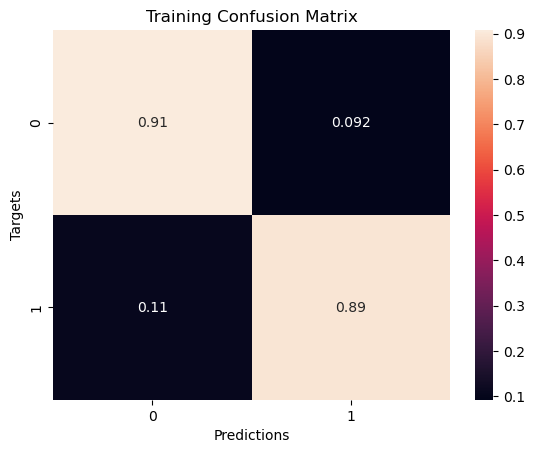

In [45]:
sns.heatmap(cf,annot = True)
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.title('Training Confusion Matrix');

In [46]:
def predict_and_plot(inputs,targets, name = ''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    
    print("Accuracy Score: ", accuracy*100)
    
    cf = confusion_matrix(targets,preds, normalize = 'true' )
    plt.figure
    sns.heatmap(cf, annot = True)
    plt.xlabel('Predictions')
    plt.ylabel('Targets')
    plt.title('{} Confusion Matrix' .format(name))
    
    return preds

Accuracy Score:  90.12345679012346


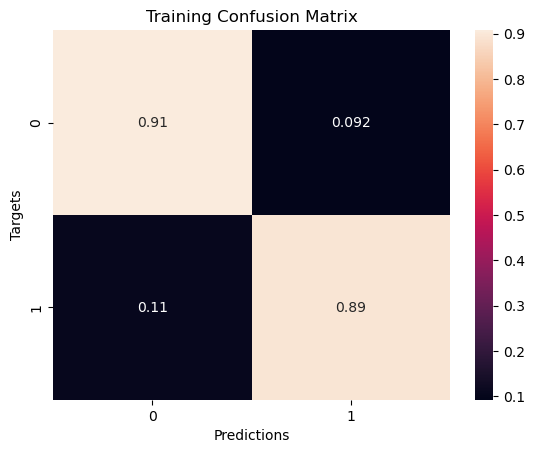

In [47]:
train_preds = predict_and_plot(train_inputs, train_targets, name = 'Training')

Accuracy Score:  90.12345679012346


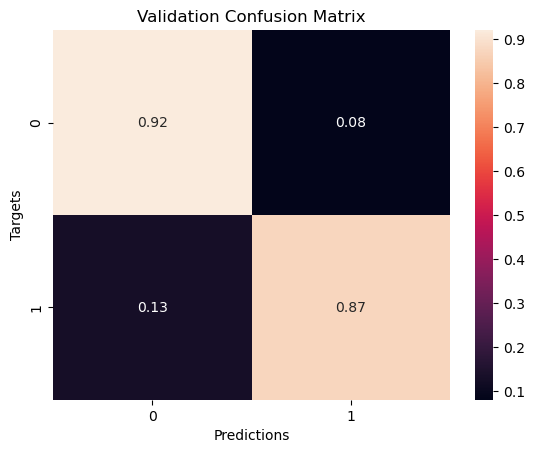

In [48]:
val_preds = predict_and_plot(val_inputs,val_targets, name = 'Validation')

Accuracy Score:  89.23076923076924


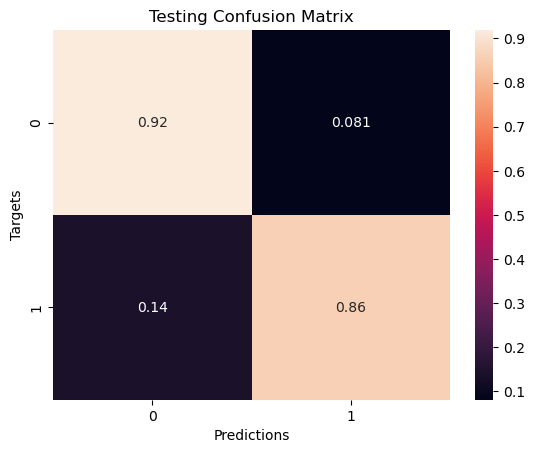

In [49]:
test_preds = predict_and_plot(test_inputs,test_targets, name = 'Testing')

In [50]:
def random_guess(inputs):
    return np.random.choice(["No","Yes"], len(inputs))

In [51]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [52]:
def all_yes(inputs):
    return np.full(len(inputs), "Yes")

In [53]:
accuracy_score(train_targets, random_guess(train_inputs))

0.51440329218107

In [54]:
accuracy_score(test_targets, all_no(test_inputs))

0.5692307692307692

## Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtmodel = DecisionTreeClassifier(random_state = 45)

In [57]:
%%time
dtmodel.fit(train_inputs,train_targets)

Wall time: 3.99 ms


DecisionTreeClassifier(random_state=45)

### Evaluation

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
train_preds = dtmodel.predict(train_inputs)

In [60]:
train_preds

array(['No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
    

In [61]:
accuracy_score(train_targets,train_preds)

0.9465020576131687

In [62]:
train_probs = dtmodel.predict_proba(train_inputs)

In [63]:
train_probs

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. ,

In [64]:
val_preds = dtmodel.predict(val_inputs)

In [65]:
accuracy_score(val_targets,val_preds)

0.8765432098765432

In [66]:
test_preds = dtmodel.predict(test_inputs)

In [67]:
accuracy_score(test_targets,test_preds)

0.8615384615384616

In [68]:
def predict_and_plot(inputs,targets, name = ''):
    preds = dtmodel.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    
    print("Accuracy Score: ", accuracy*100)
    
    cf = confusion_matrix(targets,preds, normalize = 'true' )
    plt.figure
    sns.heatmap(cf, annot = True)
    plt.xlabel('Predictions')
    plt.ylabel('Targets')
    plt.title('{} Confusion Matrix' .format(name))
    
    return preds

Accuracy Score:  94.65020576131687


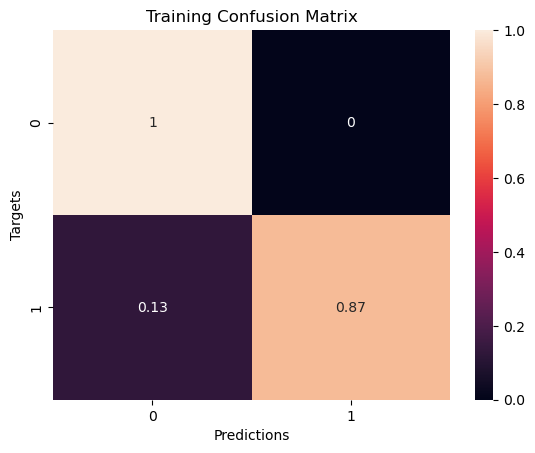

In [69]:
predict_and_plot(train_inputs,train_targets, name = 'Training');

Accuracy Score:  87.65432098765432


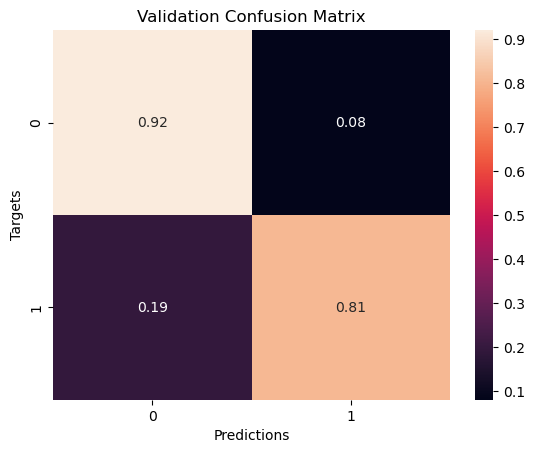

In [70]:
predict_and_plot(val_inputs,val_targets, name = 'Validation');

Accuracy Score:  86.15384615384616


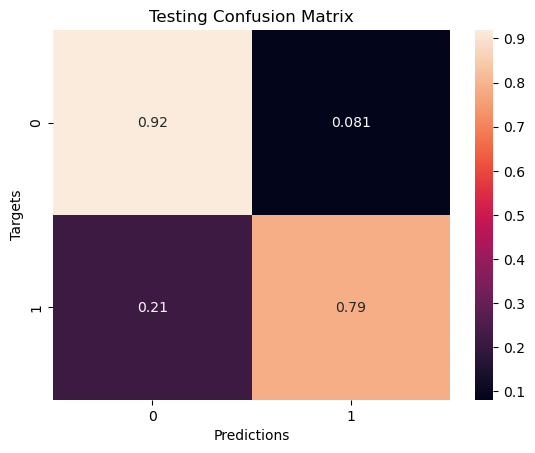

In [71]:
predict_and_plot(test_inputs,test_targets, name = 'Testing');

In [72]:
dtmodel.score(train_inputs,train_targets)

0.9465020576131687

In [73]:
dtmodel.score(val_inputs,val_targets)

0.8765432098765432

In [74]:
dtmodel.score(test_inputs,test_targets)

0.8615384615384616

In [75]:
raw_df['flow_condition'].value_counts()/len(raw_df)

No     0.589506
Yes    0.410494
Name: flow_condition, dtype: float64

## Visulaisation of Decision tree

In [76]:
from sklearn.tree import plot_tree, export_text

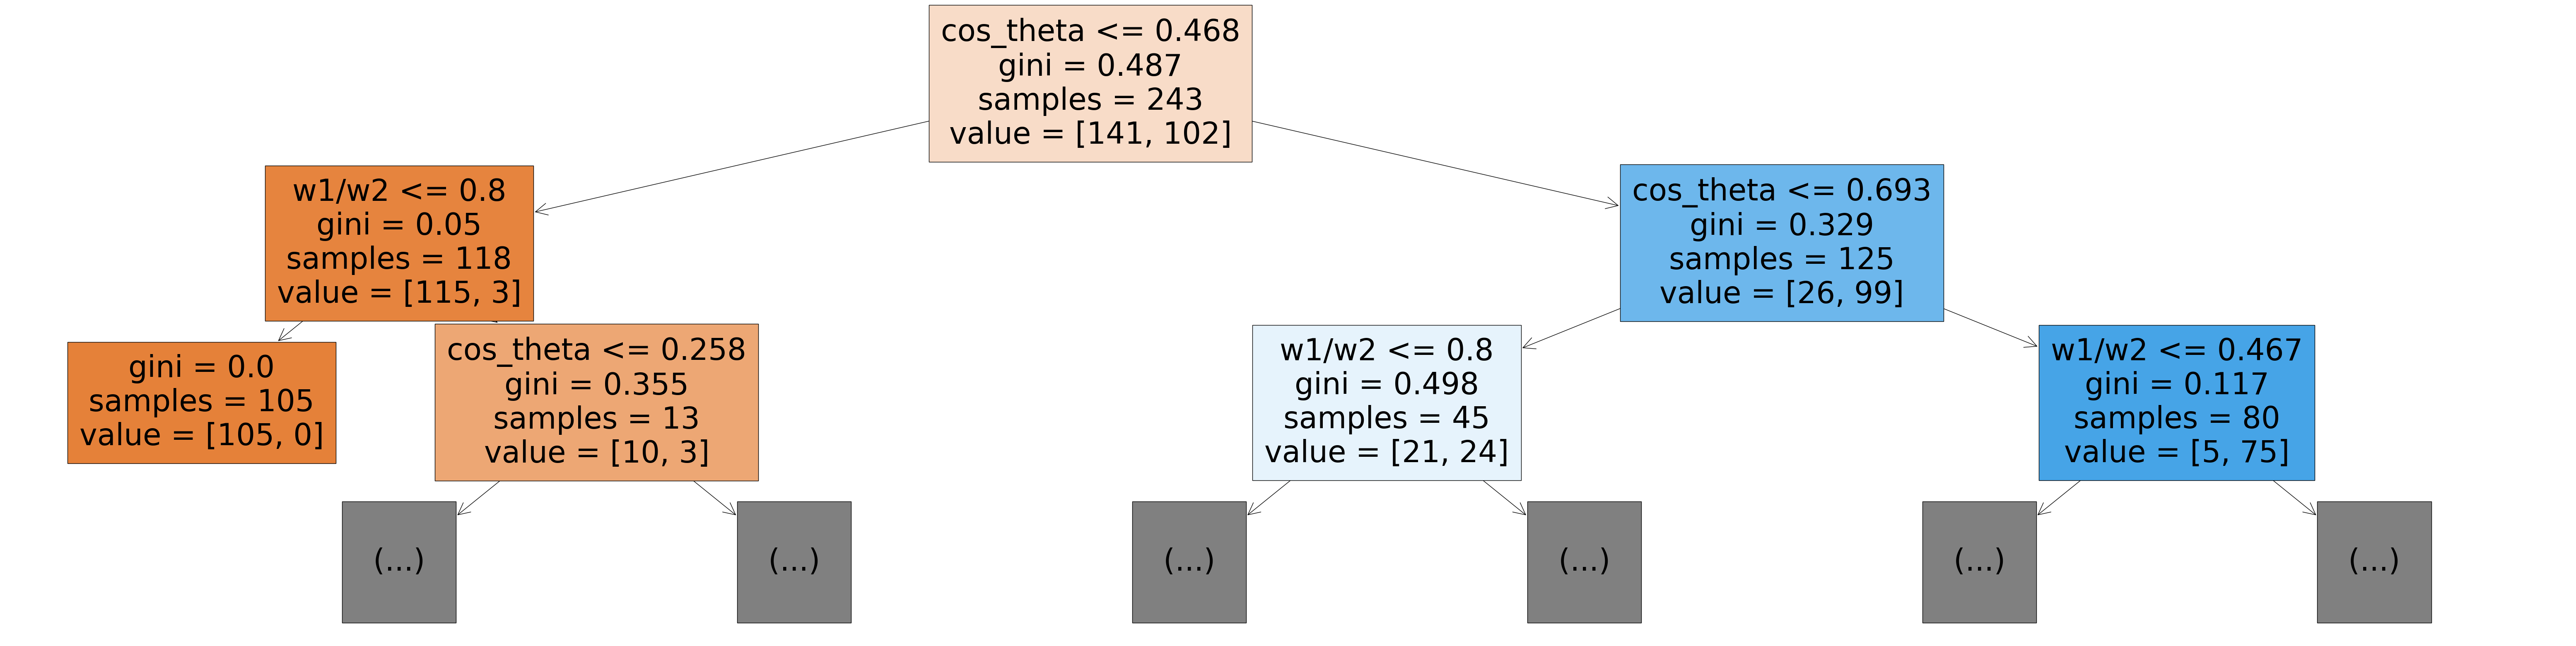

In [77]:
plt.figure(figsize = (80,20))
plot_tree(dtmodel, feature_names = train_inputs.columns, max_depth = 2, filled = True);

In [78]:
dtmodel.tree_.max_depth

9

In [79]:
dtmodel.feature_importances_

array([0.12117251, 0.08505607, 0.78734939, 0.00642203])

In [80]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': dtmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [81]:
importance_df

,feature,importance
2,cos_theta,0.787349
0,h1/h2,0.121173
1,w1/w2,0.085056
3,sigma,0.006422


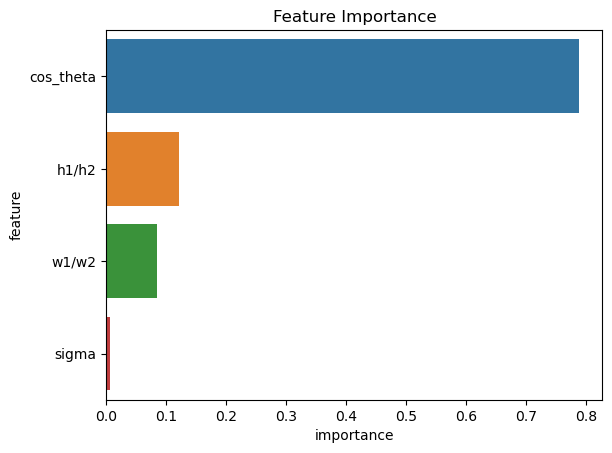

In [82]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Hyperparameter Tuning and Overfitting

In [83]:
dtmodel = DecisionTreeClassifier(max_depth=7, random_state=43)

In [84]:
dtmodel.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=7, random_state=43)

In [85]:
dtmodel.score(train_inputs, train_targets)

0.9423868312757202

In [86]:
dtmodel.score(val_inputs, val_targets)

0.8888888888888888

In [87]:
dtmodel.score(test_inputs, test_targets)

0.8769230769230769

In [88]:
print(export_text(dtmodel, feature_names=list(train_inputs.columns)))

|--- cos_theta <= 0.47
|   |--- w1/w2 <= 0.80
|   |   |--- class: No
|   |--- w1/w2 >  0.80
|   |   |--- cos_theta <= 0.26
|   |   |   |--- class: No
|   |   |--- cos_theta >  0.26
|   |   |   |--- h1/h2 <= 0.89
|   |   |   |   |--- class: Yes
|   |   |   |--- h1/h2 >  0.89
|   |   |   |   |--- class: No
|--- cos_theta >  0.47
|   |--- cos_theta <= 0.69
|   |   |--- w1/w2 <= 0.80
|   |   |   |--- w1/w2 <= 0.47
|   |   |   |   |--- h1/h2 <= 0.68
|   |   |   |   |   |--- w1/w2 <= 0.24
|   |   |   |   |   |   |--- w1/w2 <= 0.07
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- w1/w2 >  0.07
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- w1/w2 >  0.24
|   |   |   |   |   |   |--- h1/h2 <= 0.39
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- h1/h2 >  0.39
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- h1/h2 >  0.68
|   |   |   |   |   |--- w1/w2 <= 0.24
|   |   |   |   |   |   |--- w1/w2 <= 0.07
|   |   |  

In [89]:
def max_depth_error(md):
    dtmodel = DecisionTreeClassifier(max_depth=md, random_state=43)
    dtmodel.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    val_acc = 1 - model.score(val_inputs, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [90]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,9)])
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.098765,0.098765
1,2,0.098765,0.098765
2,3,0.098765,0.098765
3,4,0.098765,0.098765
4,5,0.098765,0.098765
5,6,0.098765,0.098765
6,7,0.098765,0.098765
7,8,0.098765,0.098765


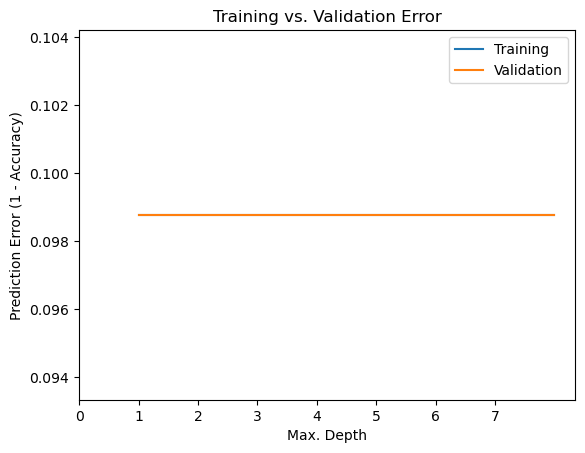

In [91]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,8))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Here from the graph we can see that there is not much difference in the accuracy when there is a change in the max_depth of the model

## Training a Random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfmodel = RandomForestClassifier(n_jobs = -1, random_state = 50)

In [94]:
%%time
rfmodel.fit(train_inputs, train_targets)

Wall time: 136 ms


RandomForestClassifier(n_jobs=-1, random_state=50)

In [95]:
rfmodel.score(train_inputs, train_targets)

0.9465020576131687

In [96]:
rfmodel.score(val_inputs, val_targets)

0.8765432098765432

In [97]:
rfmodel

RandomForestClassifier(n_jobs=-1, random_state=50)

In [98]:
rfmodel.score(test_inputs, test_targets)

0.8615384615384616

In [99]:
train_probs = rfmodel.predict_proba(train_inputs)
train_probs

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.17833333, 0.82166667],
       [1.        , 0.        ],
       [0.01666667, 0.98333333],
       [0.        , 1.        ],
       [0.45566667, 0.54433333],
       [1.        , 0.        ],
       [0.04583333, 0.95416667],
       [0.01733333, 0.98266667],
       [0.48786905, 0.51213095],
       [0.02      , 0.98      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.548     , 0.452     ],
       [0.788     , 0.212     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.50766667, 0.49233333],
       [0.8925    , 0.1075    ],
       [0.01      , 0.99      ],
       [1.        , 0.        ],
       [0.49083333, 0.50916667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

In [100]:
rfmodel.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=2124297904)

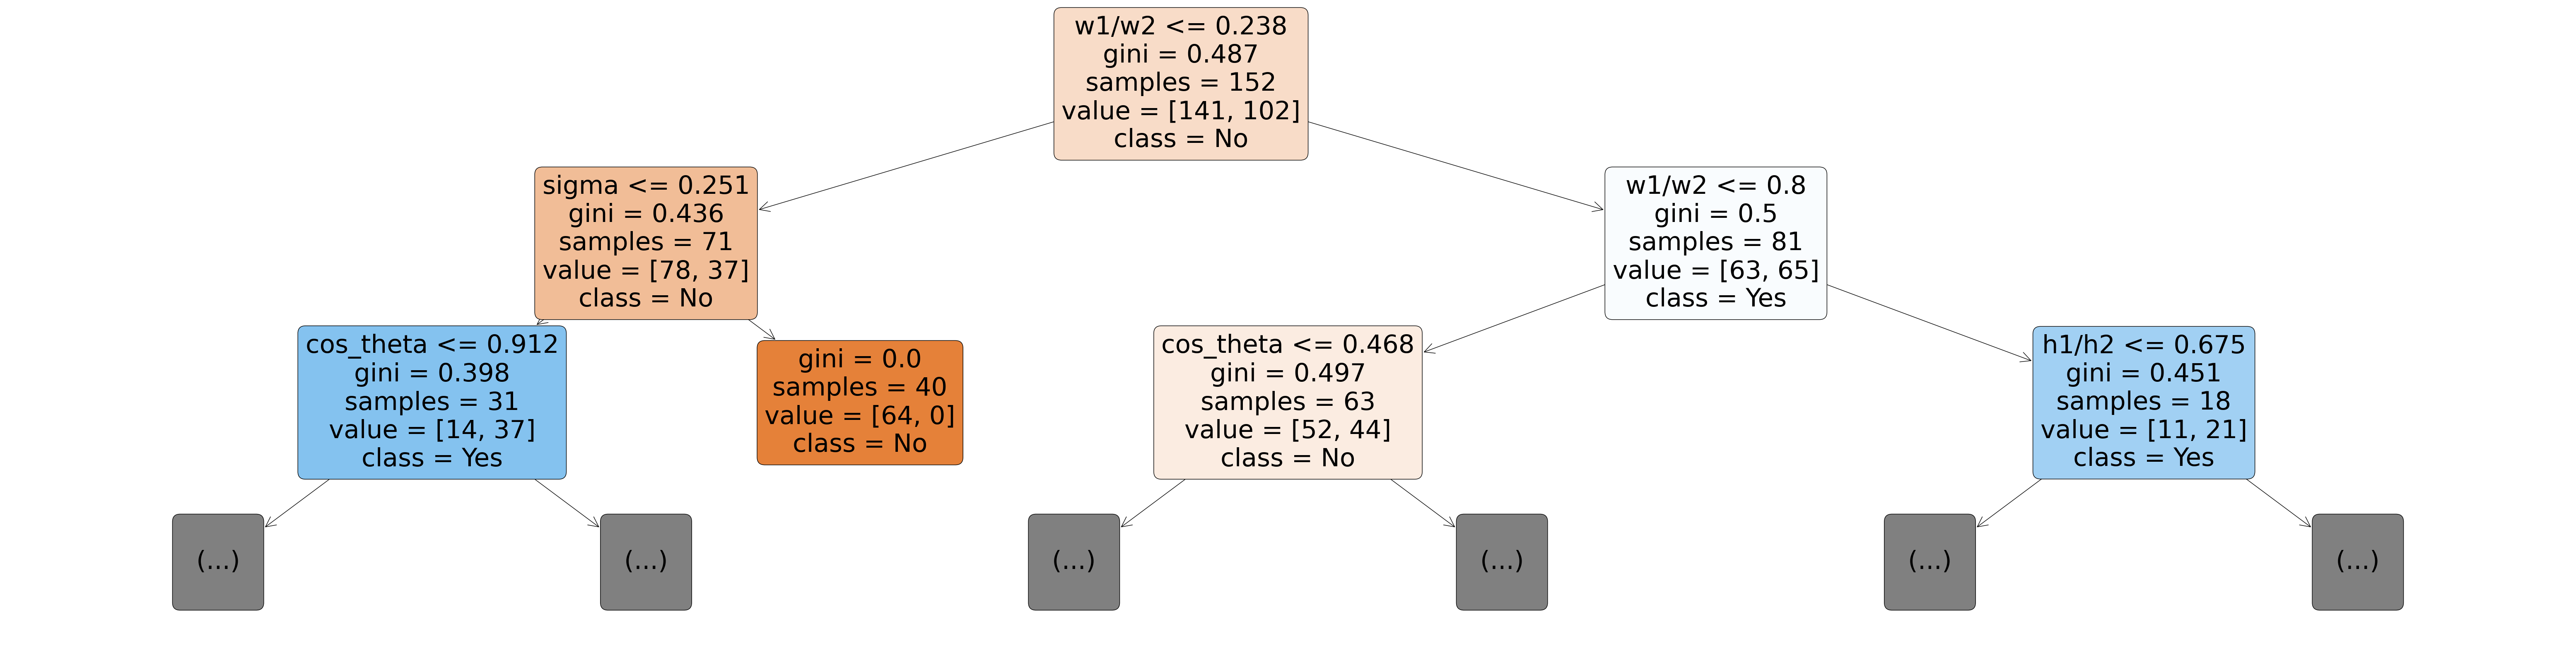

In [101]:
plt.figure(figsize=(80,20))
plot_tree(rfmodel.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, class_names=rfmodel.classes_);

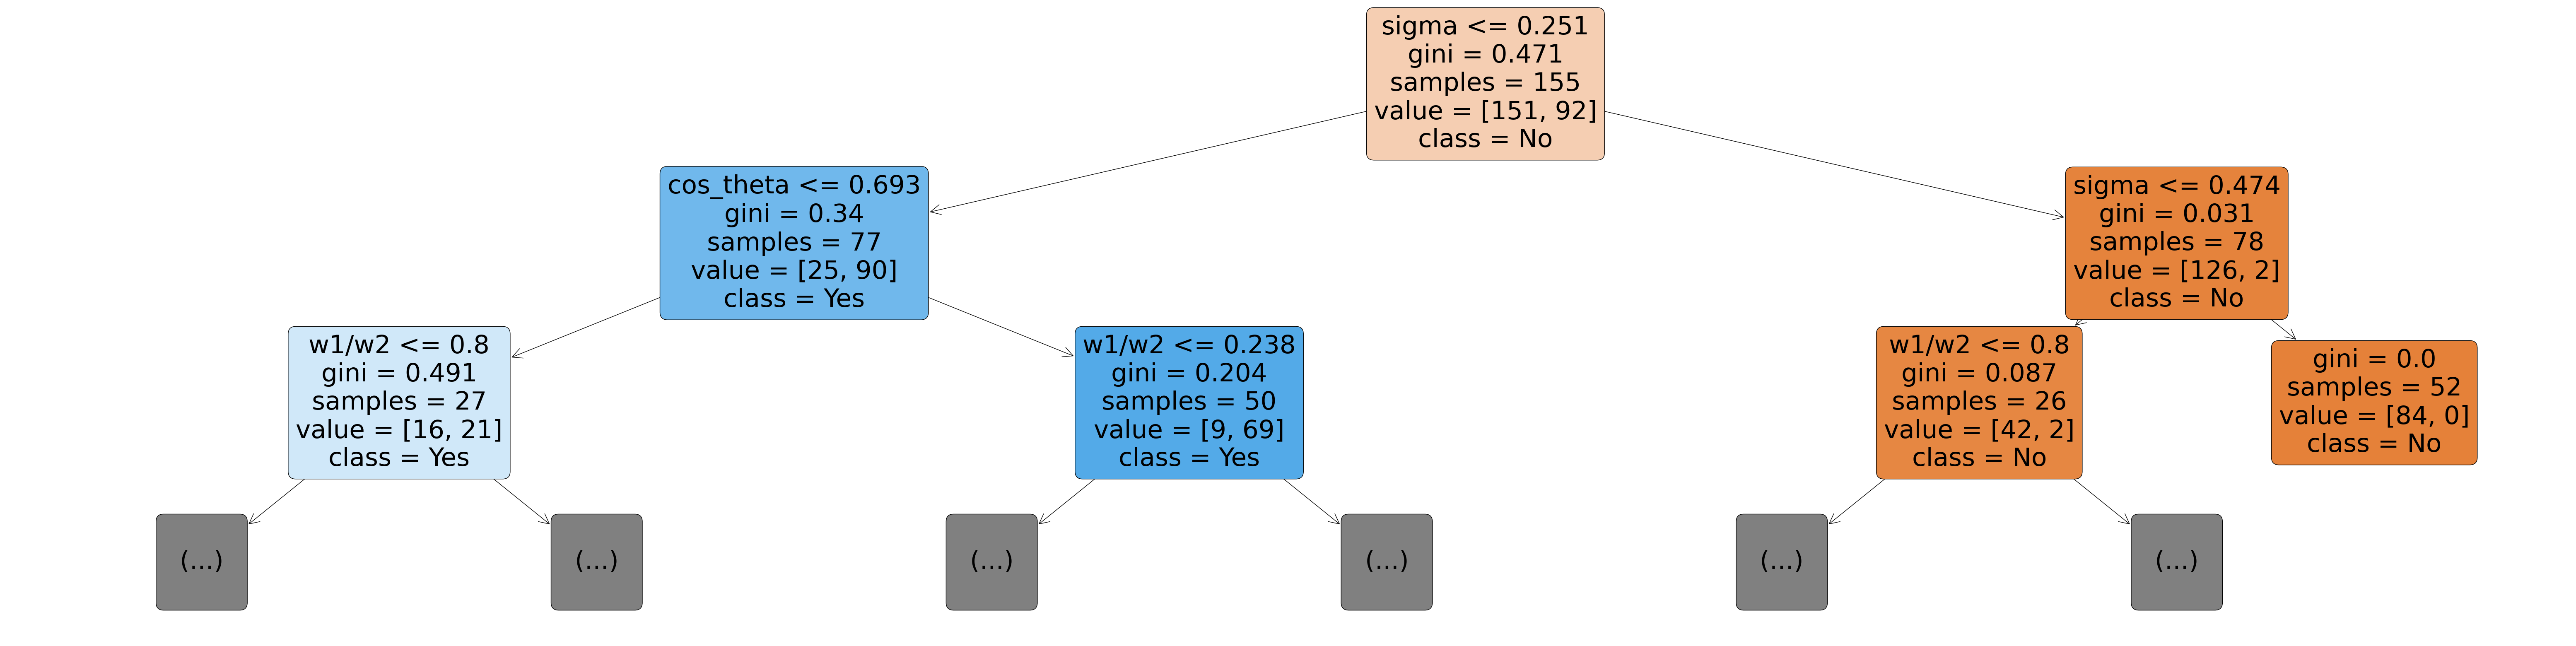

In [102]:
plt.figure(figsize=(80,20))
plot_tree(rfmodel.estimators_[20], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, class_names=rfmodel.classes_);

In [103]:
len(rfmodel.estimators_)

100

In [104]:
importance_df = pd.DataFrame({
                'feature'  : train_inputs.columns,
                'importance' : rfmodel.feature_importances_
}).sort_values('importance', ascending = False)

In [105]:
importance_df

,feature,importance
3,sigma,0.417454
2,cos_theta,0.334297
0,h1/h2,0.132530
1,w1/w2,0.115719


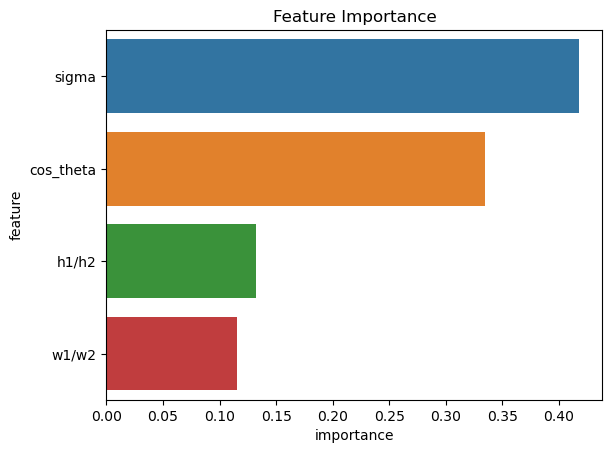

In [106]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Training Using XGBoost

In [107]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --user

In [108]:
from xgboost import XGBClassifier

In [109]:
xgmodel = XGBClassifier(random_state=50, n_jobs=-1, n_estimators=10, max_depth=9)

In [110]:
train_targets = pd.DataFrame(train_targets).replace({'Yes': 1, 'No' : 0}).copy()

In [111]:
val_targets = pd.DataFrame(val_targets).replace({'Yes': 1, 'No' : 0}).copy()


In [112]:
test_targets = pd.DataFrame(test_targets).replace({'Yes': 1, 'No' : 0}).copy()
test_targets

,flow_condition
138,1
176,1
20,1
33,1
118,0
...,...
223,0
290,0
13,1
3,0


In [113]:
%%time
xgmodel.fit(train_inputs, train_targets)

Wall time: 19.9 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=50, ...)

In [114]:
train_preds = xgmodel.predict(train_inputs)
train_preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1])

In [115]:
xgmodel.score(train_inputs,train_targets)

0.9382716049382716

In [116]:
xgmodel.score(val_inputs,val_targets)

0.9012345679012346

In [117]:
xgmodel.score(test_inputs,test_targets)

0.8923076923076924

In [118]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': xgmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [119]:
importance_df.head()

,feature,importance
2,cos_theta,0.924696
1,w1/w2,0.044185
0,h1/h2,0.031119
3,sigma,0.000000


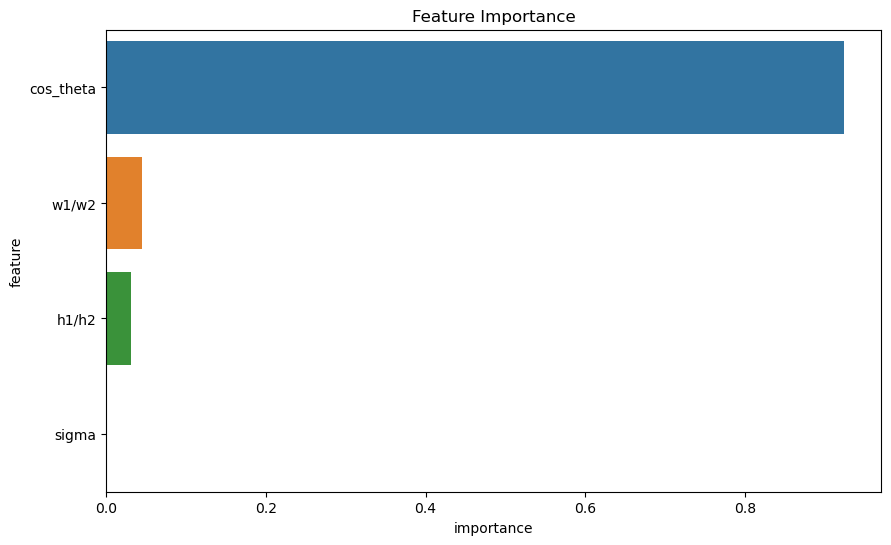

In [120]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### K Fold Cross Validation

In [121]:
from sklearn.model_selection import KFold

In [122]:
def train_and_evaluate(train_inputs, train_targets, val_inputs, val_targets, **params):
    model = XGBRegressor(random_state=45, n_jobs=-1, **params)
    model.fit(train_inputs, train_targets)
    train_accuracy = model.score(train_inputs,train_targets)
    val_accuracy = model.score(val_inputs,val_targets)
    return model, train_accuracy, train_accuracy

In [123]:
kfold = KFold(n_splits=5)